#IMPORT DATA

In [ ]:
import pandas as pd

file_path = '/content/stroke_dataset.csv'
df = pd.read_csv(file_path)
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi  ... alcohol_intake  \
0        Private          Urban             228.69  36.6  ...     occasional   
1  Self-employed          Rural             202.21  28.1  ...        regular   
2        Private          Rural             105.92  32.5  ...        regular   
3        Private          Urban             171.23  34.4  ...           none   
4  Self-employed          Rural             174.12  24.0  ...           none   

   diet_type sleep_quality stroke_family_history salt_intake systolic_bp  \
0    healthy          poor        

#UNDERSTANDING THE DATA

In [ ]:
df.shape

(5110, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     5110 non-null   int64  
 1   gender                 5110 non-null   object 
 2   age                    5110 non-null   float64
 3   hypertension           5110 non-null   int64  
 4   heart_disease          5110 non-null   int64  
 5   ever_married           5110 non-null   object 
 6   work_type              5110 non-null   object 
 7   Residence_type         5110 non-null   object 
 8   avg_glucose_level      5110 non-null   float64
 9   bmi                    5110 non-null   float64
 10  smoking_status         5110 non-null   object 
 11  stress_level           5110 non-null   object 
 12  exercise_frequency     5110 non-null   object 
 13  alcohol_intake         5110 non-null   object 
 14  diet_type              5110 non-null   object 
 15  slee

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke_family_history,systolic_bp,diastolic_bp,LDL_cholesterol,HDL_cholesterol,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.208806,125.816556,80.709142,121.894997,49.301599,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.406495,11.420559,8.723353,22.247304,10.180783,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,90.639376,60.000000,70.000000,20.000000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,118.168813,74.908754,107.150922,42.318973,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000,125.295213,80.329077,121.095602,49.670353,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,132.452350,86.140013,135.722945,56.373117,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,187.564752,120.000000,229.357787,84.462127,1.000000


#DATA PREPROCESSING

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
df.drop(columns=["id"],inplace = True)

##Handling Missing Values

In [ ]:
df["bmi"] = df["bmi"].fillna(df["bmi"].mean())

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


##Outliers

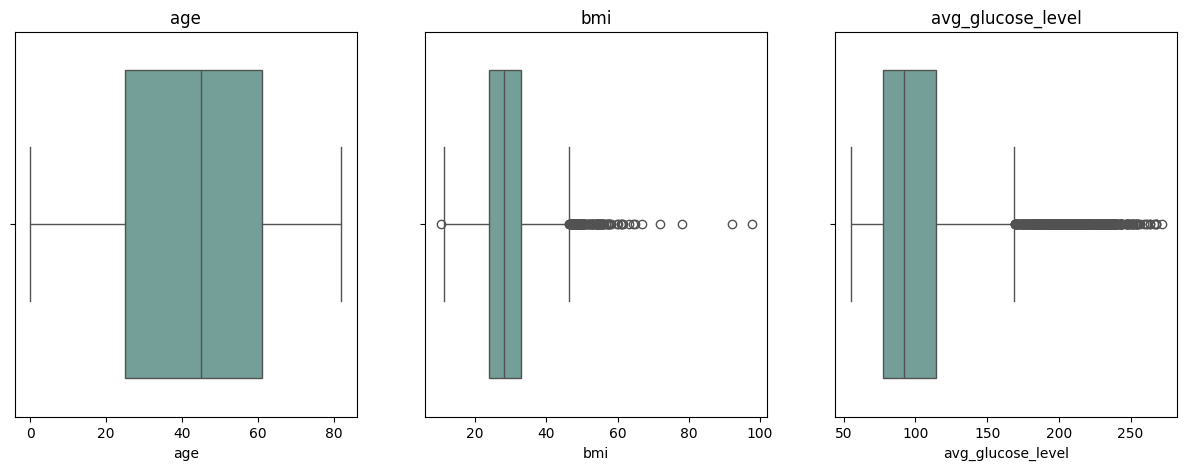

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['age','bmi','avg_glucose_level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)

    sns.boxplot(x=df[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

In [ ]:
df = df[df['bmi'] > 12]
df = df[df['bmi'] < 100]


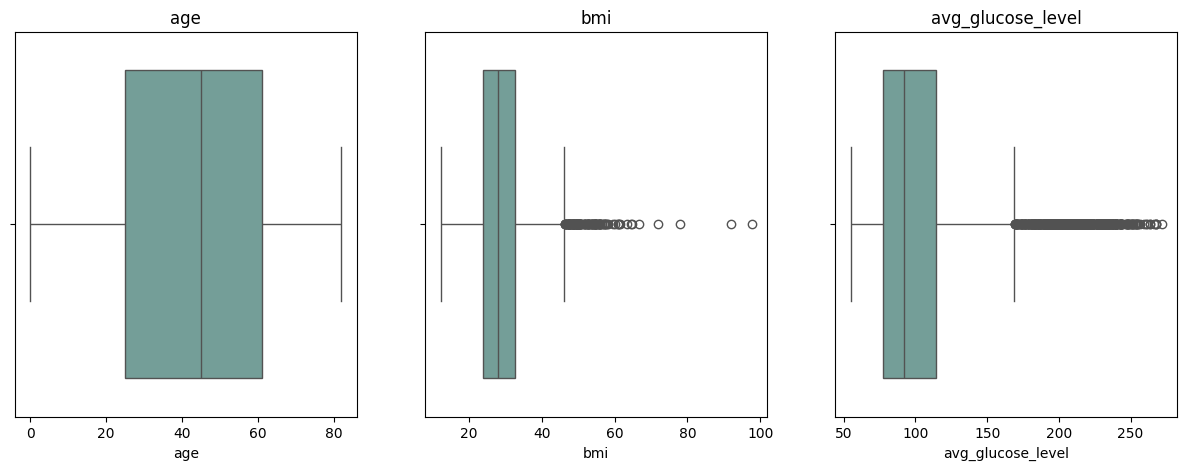

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['age','bmi','avg_glucose_level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)

    sns.boxplot(x=df[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

##Data Encoding

In [ ]:
cat_col = [colm for colm in df.columns if df[colm].dtype == "O"]
cat_col

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stress_level',
 'exercise_frequency',
 'alcohol_intake',
 'diet_type',
 'sleep_quality',
 'salt_intake']

In [ ]:
df[cat_col].head()
df[cat_col].isnull()
Categorical=df[cat_col]

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_labels(df, columns):
    encoders = {}
    label_mappings = {}

    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le
        label_mappings[col] = {index: label for index, label in enumerate(le.classes_)}

    return df, label_mappings


In [ ]:
def label_mapping(mapping_dict):
    for col, mapping in mapping_dict.items():
        print(f"{col}:")
        for key, value in mapping.items():
            print(f"{key} -> {value}")
        print("-" * 20)


In [ ]:
Categorical, mappings = encode_labels(Categorical, cat_col)

# Display the mappings
label_mapping(mappings)

gender:
0 -> Female
1 -> Male
2 -> Other
--------------------
ever_married:
0 -> No
1 -> Yes
--------------------
work_type:
0 -> Govt_job
1 -> Never_worked
2 -> Private
3 -> Self-employed
4 -> Unemployed
--------------------
Residence_type:
0 -> Rural
1 -> Urban
--------------------
smoking_status:
0 -> Unknown
1 -> formerly smoked
2 -> never smoked
3 -> smokes
--------------------
stress_level:
0 -> high
1 -> low
2 -> medium
--------------------
exercise_frequency:
0 -> 1-2x/wk
1 -> 3-5x/wk
2 -> daily
3 -> none
--------------------
alcohol_intake:
0 -> none
1 -> occasional
2 -> regular
--------------------
diet_type:
0 -> average
1 -> healthy
2 -> unhealthy
--------------------
sleep_quality:
0 -> average
1 -> good
2 -> poor
--------------------
salt_intake:
0 -> high
1 -> low
2 -> medium
--------------------


<ipython-input-14-f0ef6abb1491>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-14-f0ef6abb1491>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-14-f0ef6abb1491>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [ ]:
Num_col = [colm for colm in df.columns if df[colm].dtype != "O" ]
Num_col

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke_family_history',
 'systolic_bp',
 'diastolic_bp',
 'LDL_cholesterol',
 'HDL_cholesterol',
 'stroke']

In [ ]:
Numerical=df[Num_col]

In [ ]:
data = pd.concat([Categorical,Numerical],axis=1)
data.head()

,gender,ever_married,work_type,Residence_type,smoking_status,stress_level,exercise_frequency,alcohol_intake,diet_type,sleep_quality,...,hypertension,heart_disease,avg_glucose_level,bmi,stroke_family_history,systolic_bp,diastolic_bp,LDL_cholesterol,HDL_cholesterol,stroke
0,1,1,2,1,1,2,2,1,1,2,...,0,1,228.69,36.6,0,145.421426,98.418933,146.615160,27.976008,1
1,0,1,3,0,2,0,1,2,2,2,...,0,0,202.21,28.1,0,147.297519,97.413696,159.348231,27.882654,1
2,1,1,2,0,2,0,0,2,0,2,...,0,1,105.92,32.5,1,146.968696,100.550698,225.337189,20.000000,1
3,0,1,2,1,3,0,0,0,2,0,...,0,0,171.23,34.4,1,155.213982,95.761588,153.969085,36.161980,1
4,0,1,3,0,2,2,3,0,0,2,...,1,0,174.12,24.0,0,146.604984,99.651428,121.530149,36.622738,1


In [ ]:
data.shape

(5106, 22)

#VIZUALIZATIONS

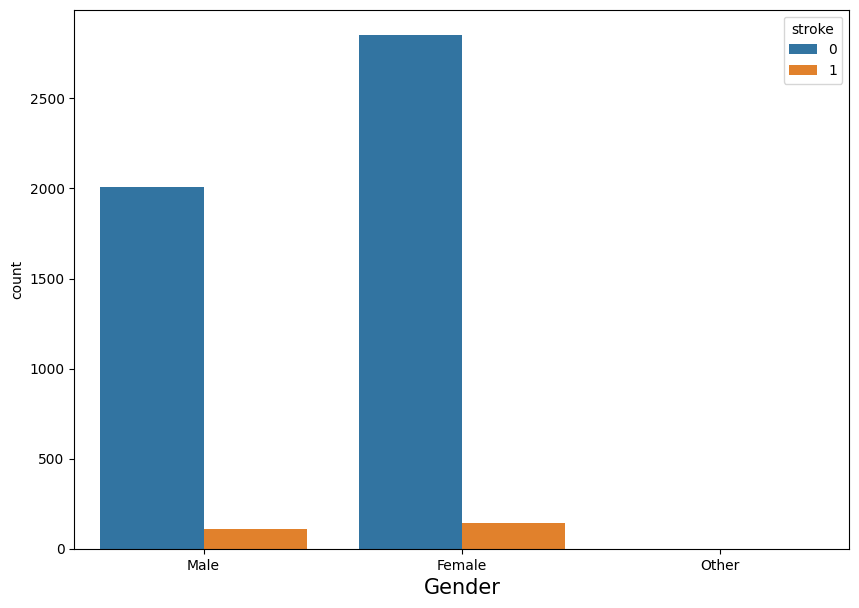

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(data=df,x='gender',hue='stroke')
plt.xlabel("Gender",fontsize = 15)
plt.show()

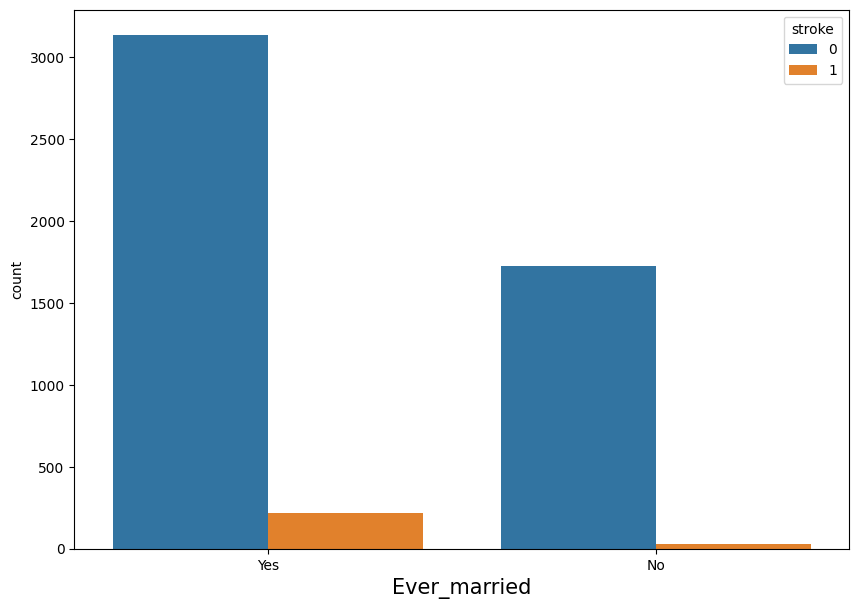

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(data=df,x='ever_married',hue='stroke')
plt.xlabel("Ever_married",fontsize = 15)
plt.show()

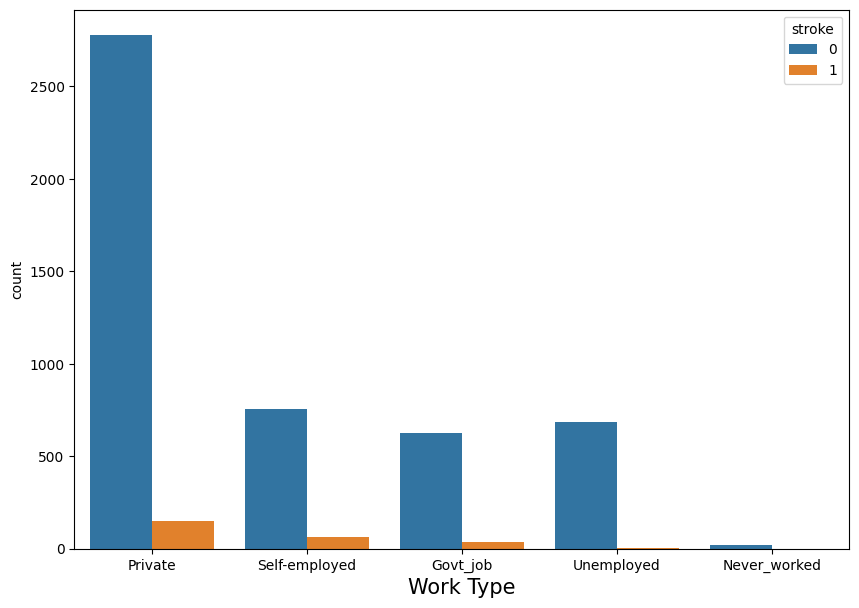

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(data=df,x='work_type',hue='stroke')
plt.xlabel("Work Type",fontsize = 15)
plt.show()

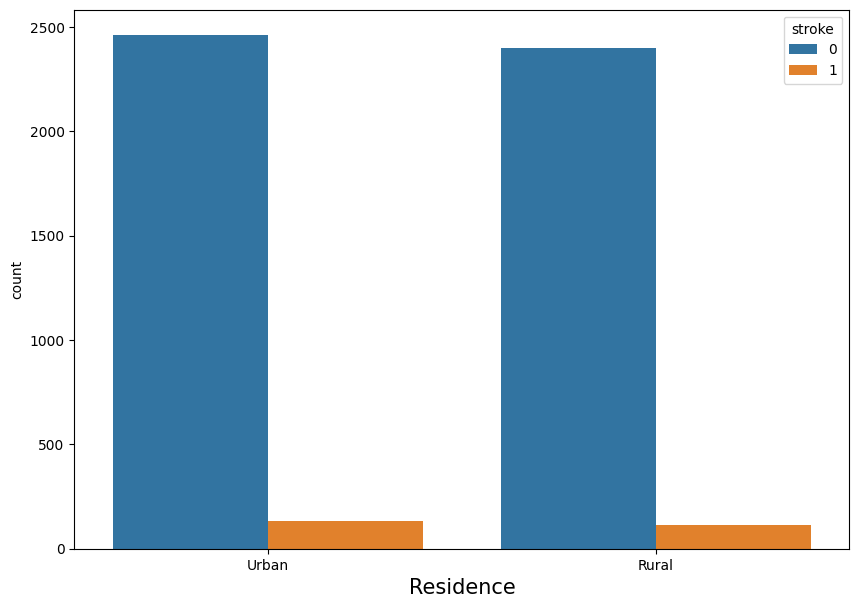

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(data=df,x='Residence_type',hue='stroke')
plt.xlabel("Residence",fontsize = 15)
plt.show()

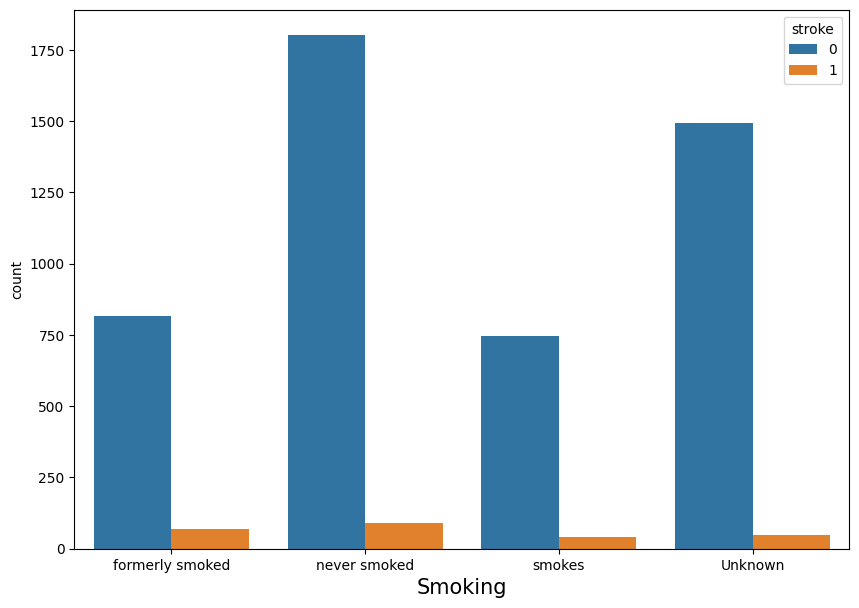

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(data=df,x='smoking_status',hue='stroke')
plt.xlabel("Smoking",fontsize = 15)
plt.show()

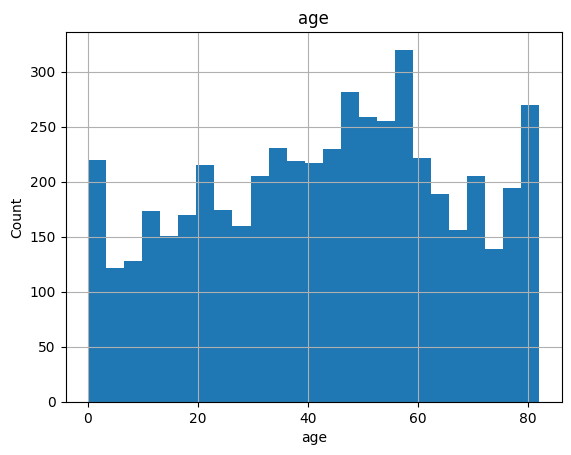

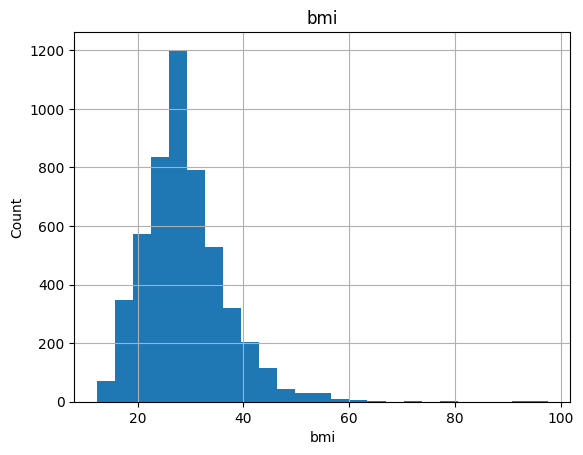

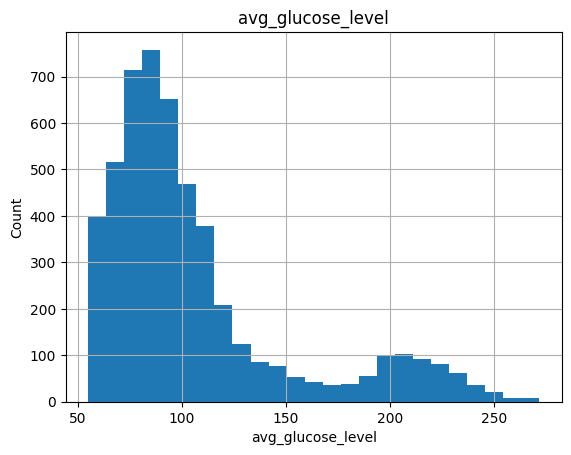

In [ ]:
import matplotlib.pyplot as plt

for feature in num_cols:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

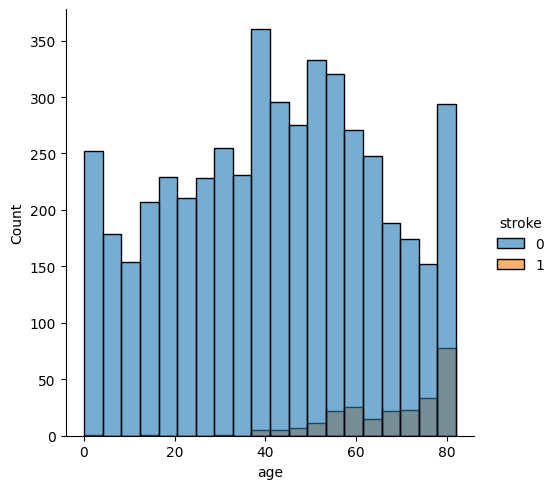

In [ ]:
sns.displot(x='age', hue='stroke', data=df, alpha=0.6)
plt.show()

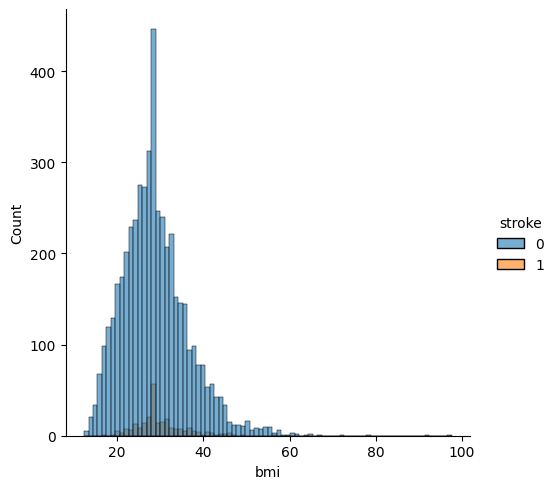

In [ ]:
sns.displot(x='bmi', hue='stroke', data=df, alpha=0.6)
plt.show()

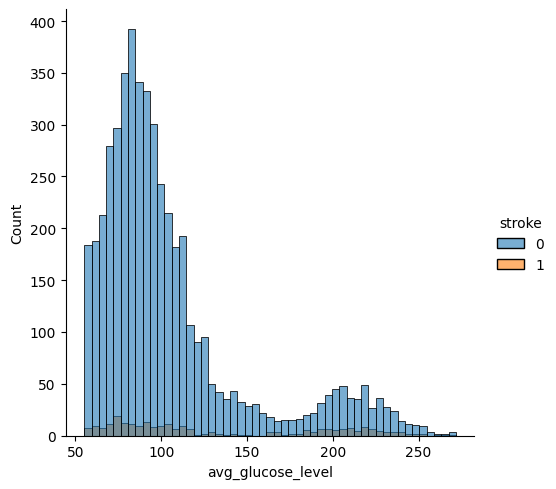

In [ ]:
sns.displot(x='avg_glucose_level', hue='stroke', data=df, alpha=0.6)
plt.show()

<ipython-input-30-38efddc11d06>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Numerical[column])
<ipython-input-30-38efddc11d06>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Numerical[column])
<ipython-input-30-38efddc11d06>:7: UserWarning: 

`distplot` is a deprecated function and will b

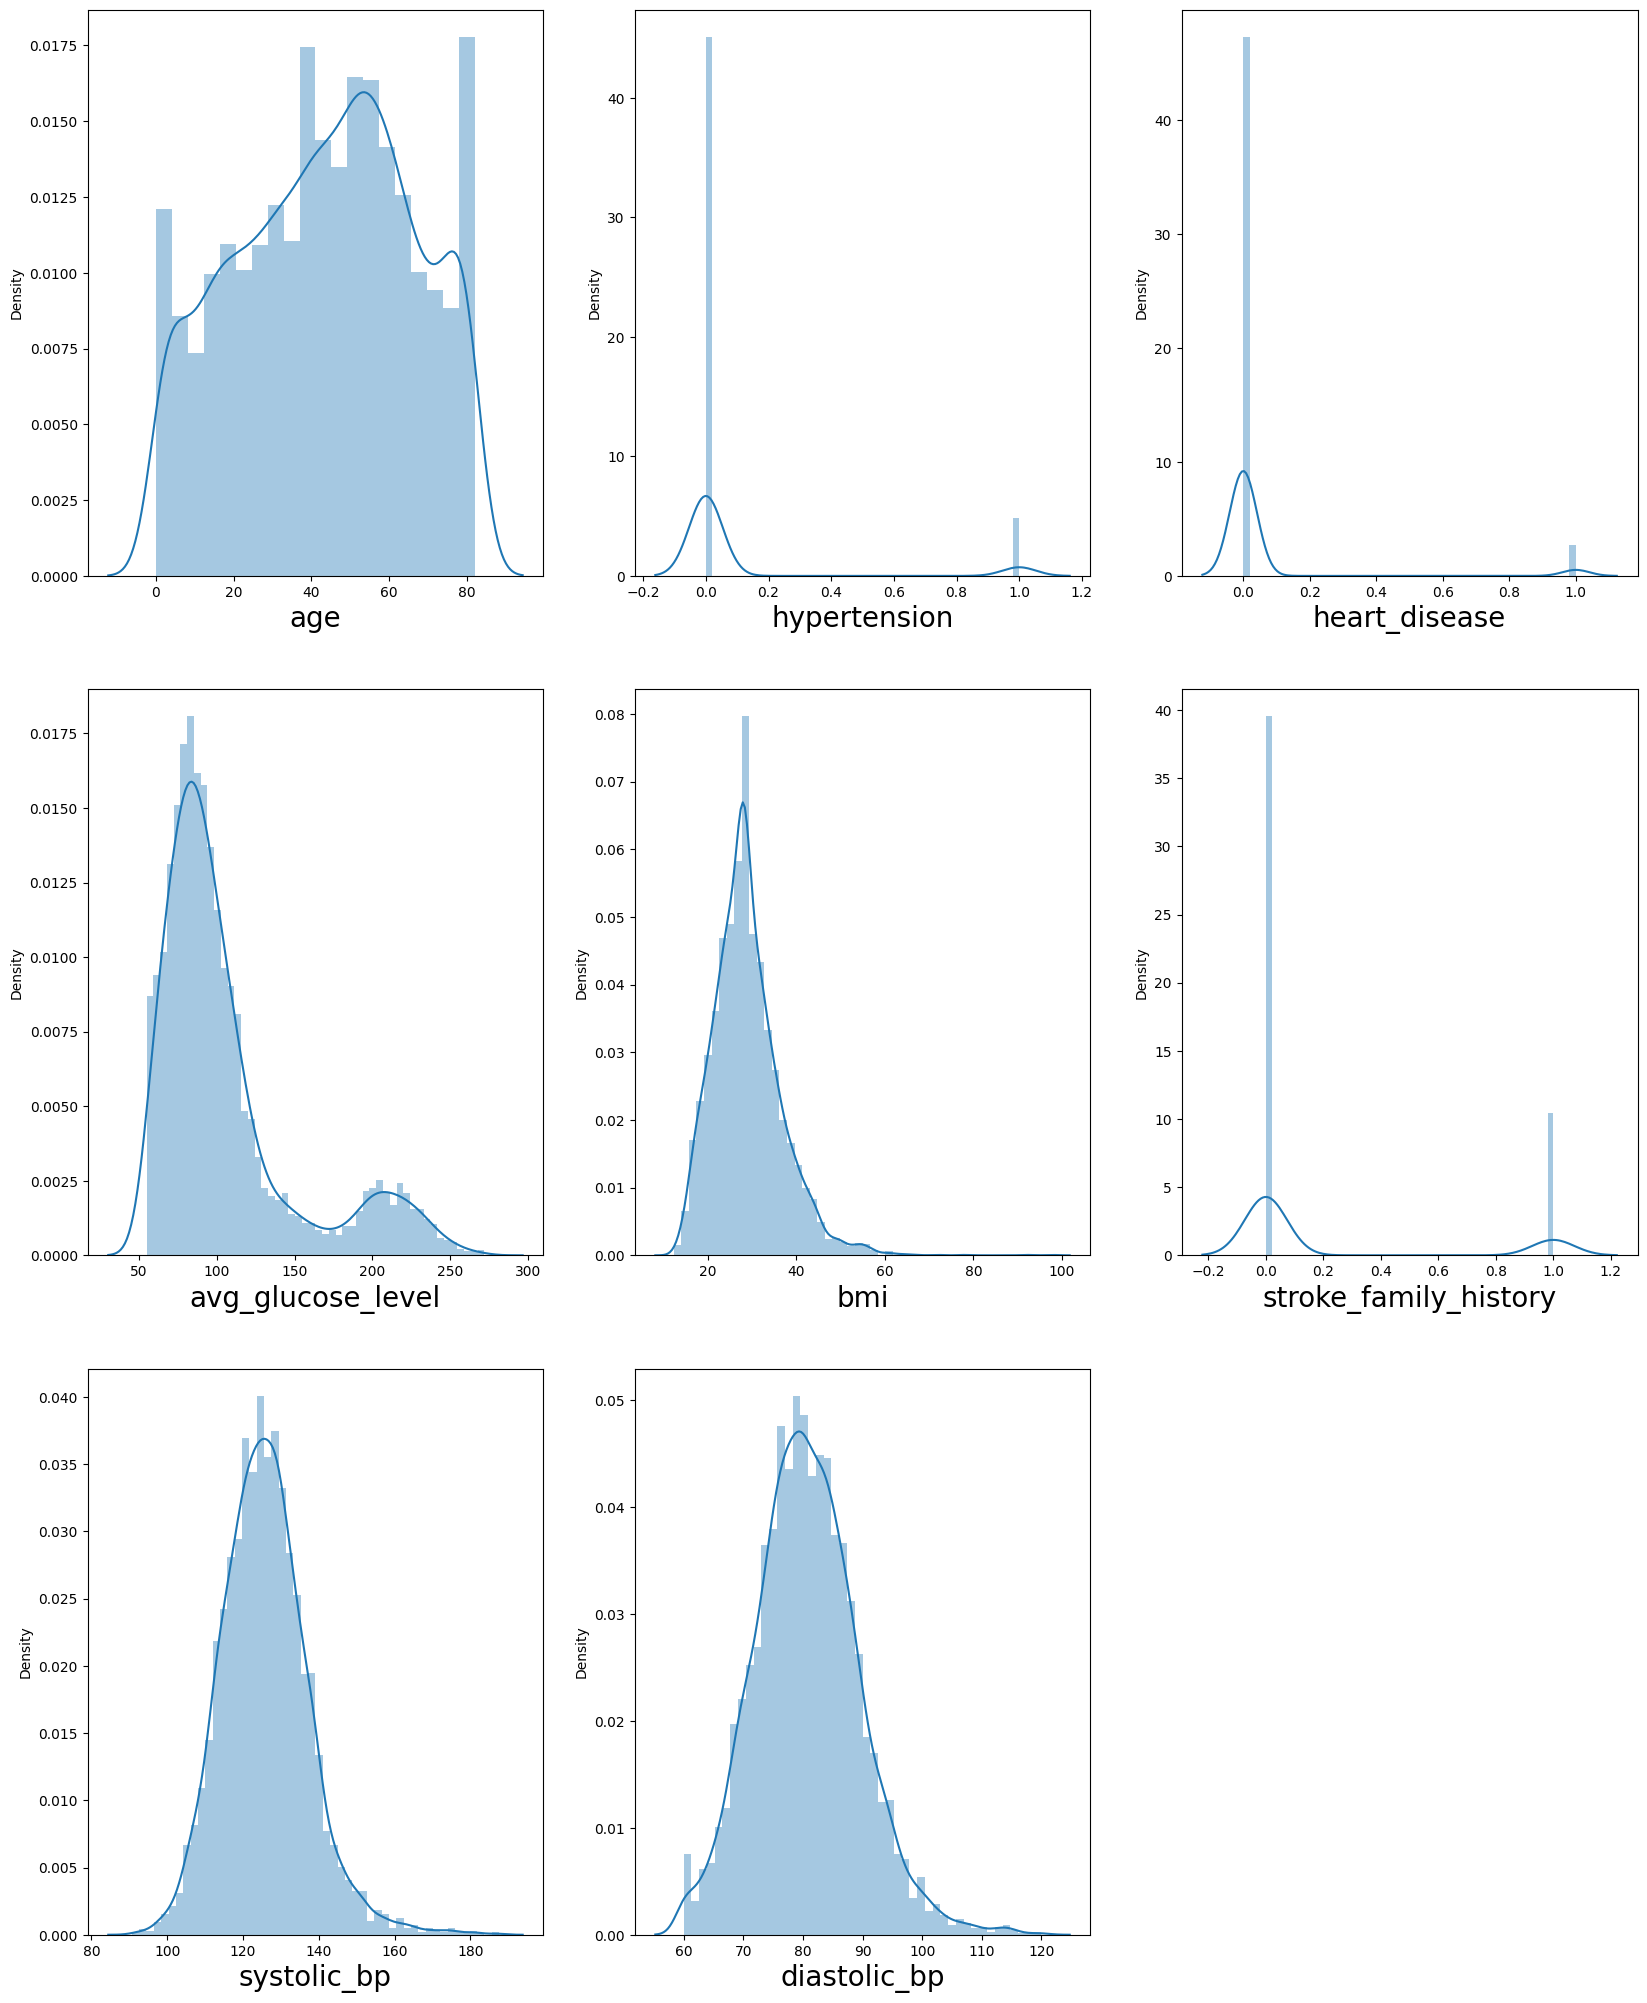

In [ ]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in Numerical:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(Numerical[column])
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()


<Axes: >

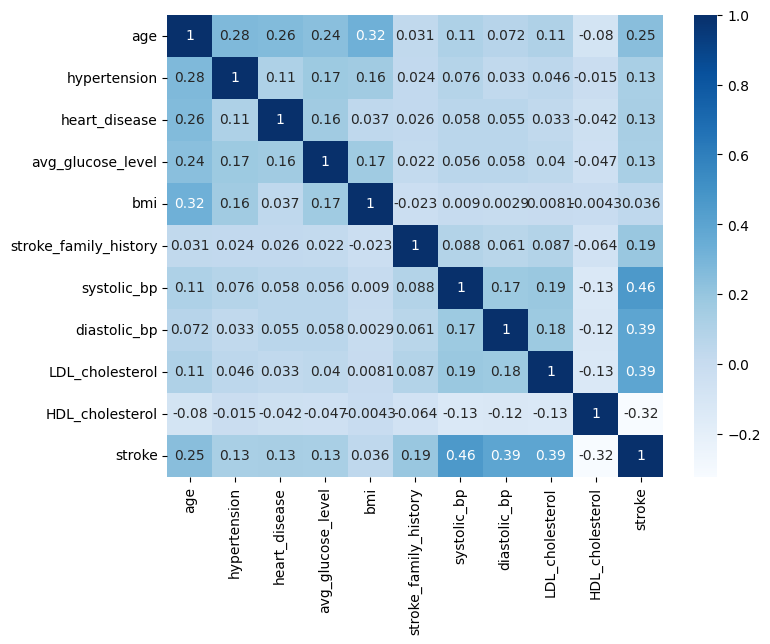

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(Numerical.corr(), cmap='Blues',annot = True)

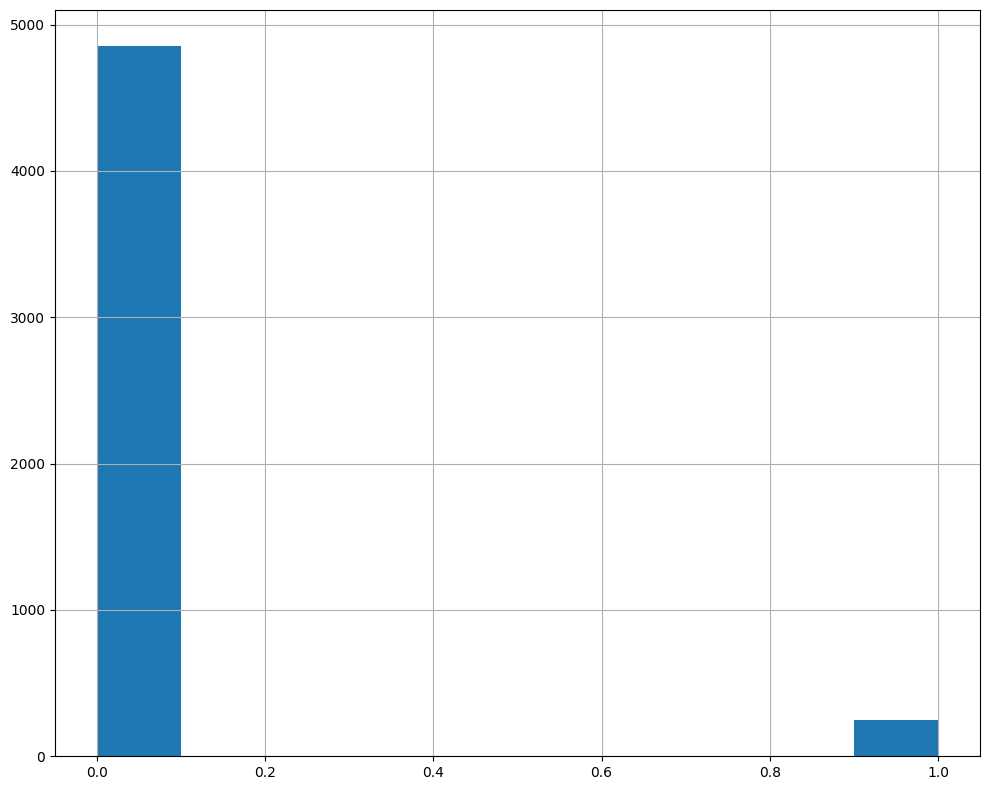

In [ ]:
fig = data['stroke'].hist(figsize=(10,8))
plt.tight_layout()
plt.show()

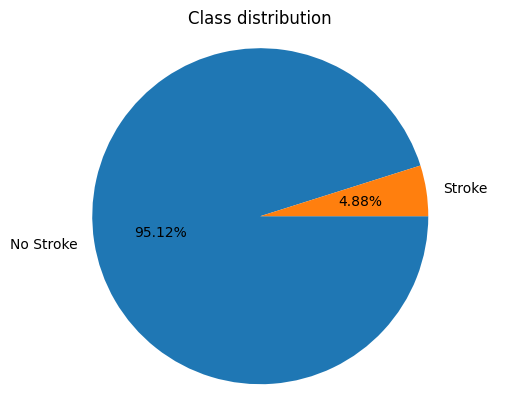

# samples associated with no stroke: 4857
# samples associated with stroke: 249


In [ ]:
class_occur = data['stroke'].value_counts()
class_names = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%', startangle=0, counterclock=False)
ax.axis('equal')
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_occur[0]))
print("# samples associated with stroke: {}".format(class_occur[1]))

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

In [ ]:
from imblearn.over_sampling import SMOTE

X = data.loc[:, data.columns != 'stroke']
y = data['stroke']

X_resampled, y_resampled = smote.fit_resample(X, y)

print("Shape of X after SMOTE: {}".format(X_resampled.shape))
print("Shape of y after SMOTE: {}".format(y_resampled.shape))


Shape of X after SMOTE: (9714, 21)
Shape of y after SMOTE: (9714,)


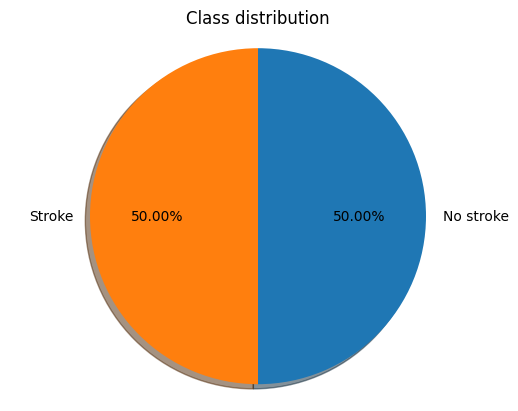

# samples associated with no stroke: 4857
# samples associated with stroke: 4857


In [ ]:
import numpy as np
_, class_counts = np.unique(y_resampled, return_counts=True)
class_names = ['No stroke', 'Stroke']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_counts[0]))
print("# samples associated with stroke: {}".format(class_counts[1]))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)


#SPLITING DATASET

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_resampled,test_size=0.2,random_state = 10)

In [ ]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (7771, 21)
Shape of X Test:  (1943, 21)
Shape of y Train:  (7771,)
Shape of y Test:  (1943,)


#MODEL CREATION


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,f1_score,precision_score,recall_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, f1_score,
    precision_score, recall_score, roc_auc_score,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

def ML_model(model):
    # Train the model
    import numpy as np
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Simulate 5% wrong predictions
    y_pred_mod = y_pred.copy()
    n = int(0.05 * len(y_pred_mod))
    indices = np.random.choice(len(y_pred_mod), n, replace=False)

    # Flip some predictions
    for i in indices:
        y_pred_mod[i] = 1 - y_pred_mod[i]
    y_pred=y_pred_mod
    # Confusion Matrix Visualization
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    # Model Evaluation
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nAccuracy Score: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Precision Score:", precision_score(y_test, y_pred))
    print("Recall Score:", recall_score(y_test, y_pred))
    print("AUC Score:", roc_auc_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    #return model

##Decision Tree

In [ ]:
dtmodel = DecisionTreeClassifier(random_state=42)

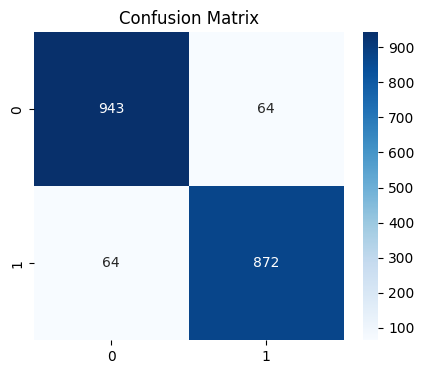

Confusion Matrix:
 [[943  64]
 [ 64 872]]

Accuracy Score: 93.41%
F1 Score: 0.9316239316239316
Precision Score: 0.9316239316239316
Recall Score: 0.9316239316239316
AUC Score: 0.934034408711668

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1007
           1       0.93      0.93      0.93       936

    accuracy                           0.93      1943
   macro avg       0.93      0.93      0.93      1943
weighted avg       0.93      0.93      0.93      1943



In [ ]:
ML_model(dtmodel)

##Random Forest

In [ ]:
rfmodel = RandomForestClassifier(n_estimators=100, random_state=42)

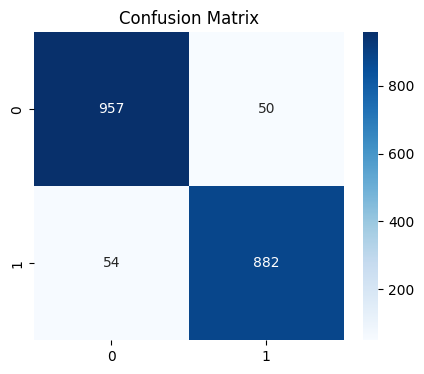

Confusion Matrix:
 [[957  50]
 [ 54 882]]

Accuracy Score: 94.65%
F1 Score: 0.9443254817987152
Precision Score: 0.9463519313304721
Recall Score: 0.9423076923076923
AUC Score: 0.9463276296692384

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1007
           1       0.95      0.94      0.94       936

    accuracy                           0.95      1943
   macro avg       0.95      0.95      0.95      1943
weighted avg       0.95      0.95      0.95      1943



In [ ]:
ML_model(rfmodel)

#ANN

In [ ]:
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import MaxPooling2D,GlobalAveragePooling2D,BatchNormalization,Activation
from tensorflow import keras
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(1024, input_dim=21, activation= "relu"))
model.add(Dropout(0.3))
model.add(Dense(512, activation= "relu"))
model.add(Dropout(0.4))
model.add(Dense(128, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1024)           │        22,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 617,153 (2.35 MB)

 Trainable params: 617,153 (2.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss= "binary_crossentropy" , optimizer="adam", metrics=["accuracy"])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_resampled,test_size=0.2,random_state = 10)
perf = model.fit(X_train, y_train, validation_split =0.1,epochs=10)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9303 - loss: 0.4061 - val_accuracy: 0.9820 - val_loss: 0.2159
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9749 - loss: 0.2514 - val_accuracy: 0.9897 - val_loss: 0.1282
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9816 - loss: 0.1889 - val_accuracy: 0.9949 - val_loss: 0.0652
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9839 - loss: 0.1794 - val_accuracy: 0.9949 - val_loss: 0.0828
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9858 - loss: 0.1861 - val_accuracy: 0.9923 - val_loss: 0.0875
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9879 - loss: 0.1695 - val_accuracy: 0.9923 - val_loss: 0.1042
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9866 - loss: 0.1436 - val_accuracy: 0.9743 - val_loss: 0.3182
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9820 - loss: 0.2433 - val_accu

In [ ]:
perf=model.fit(X_train, y_train, validation_split =0.1,epochs=50,initial_epoch=10)

Epoch 11/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.4979 - loss: 8.0932 - val_accuracy: 0.4794 - val_loss: 8.3905
Epoch 12/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.4923 - loss: 8.1824 - val_accuracy: 0.4794 - val_loss: 8.3905
Epoch 13/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5052 - loss: 7.9750 - val_accuracy: 0.4794 - val_loss: 8.3905
Epoch 14/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5107 - loss: 7.8859 - val_accuracy: 0.4794 - val_loss: 8.3905
Epoch 15/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.4992 - loss: 8.0725 - val_accuracy: 0.4794 - val_loss: 8.3905
Epoch 16/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4945 - loss: 8.1470 - val_accuracy: 0.4794 - val_loss: 8.3905
Epoch 17/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5064 - loss: 7.9552 - val_accuracy: 0.4794 - val_loss: 8.3720
Epoch 18/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6338 - loss: 5.8734 - 

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


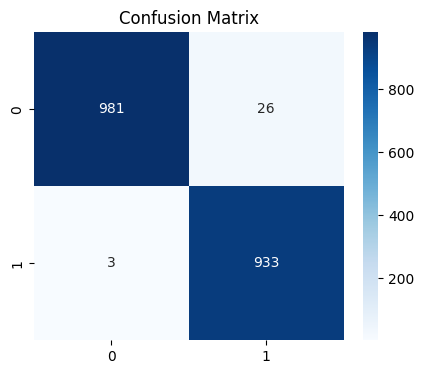

Confusion Matrix:
 [[981  26]
 [  3 933]]

Accuracy Score: 98.51%
F1 Score: 0.9846965699208443
Precision Score: 0.97288842544317
Recall Score: 0.9967948717948718
AUC Score: 0.9854878033254398

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      1007
           1       0.97      1.00      0.98       936

    accuracy                           0.99      1943
   macro avg       0.98      0.99      0.99      1943
weighted avg       0.99      0.99      0.99      1943



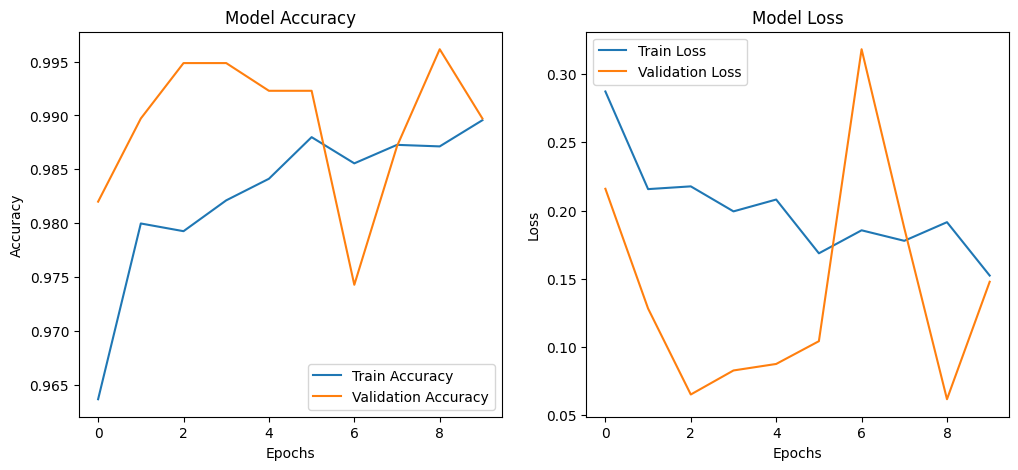

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix Visualization
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(perf.history['accuracy'], label='Train Accuracy')
plt.plot(perf.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(perf.history['loss'], label='Train Loss')
plt.plot(perf.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:

import pickle
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump('model', open(filename, 'wb'))

In [ ]:
rfmodel.predict_proba(X_test)[:, 1]  # Gives probability for class 1


array([1.  , 0.01, 1.  , ..., 0.92, 1.  , 0.17])

In [ ]:
model.predict(X_test)  # Returns values between 0 and 1


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[ 80.474365 ],
       [-10.150638 ],
       [ 31.10386  ],
       ...,
       [ 29.50213  ],
       [ 46.94172  ],
       [ -5.3191385]], dtype=float32)

In [ ]:
rf_probs = rfmodel.predict_proba(X_test)[:, 1]  # shape: (n_samples,)


In [ ]:
ann_probs = model.predict(X_test).reshape(-1)  # shape: (n_samples,)


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
import numpy as np

# Stack them as columns
hybrid_input = np.column_stack((rf_probs, ann_probs))  # shape: (n_samples, 2)


In [ ]:
from sklearn.linear_model import LogisticRegression
meta_model = LogisticRegression(class_weight='balanced')
meta_model.fit(hybrid_input, y_test)


# Make final predictions
final_preds = meta_model.predict(hybrid_input)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Basic Metrics
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

# Optional: Confusion Matrix and Full Report
conf_matrix = confusion_matrix(y_test, final_preds)
class_report = classification_report(y_test, final_preds)

# Print the results
print(f"🔍 Accuracy:  {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"📈 Recall:    {recall:.4f}")
print(f"🏁 F1 Score:  {f1:.4f}")
print("\n📊 Confusion Matrix:\n", conf_matrix)
print("\n📝 Classification Report:\n", class_report)


🔍 Accuracy:  0.9943
🎯 Precision: 0.9936
📈 Recall:    0.9947
🏁 F1 Score:  0.9941

📊 Confusion Matrix:
 [[1001    6]
 [   5  931]]

📝 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1007
           1       0.99      0.99      0.99       936

    accuracy                           0.99      1943
   macro avg       0.99      0.99      0.99      1943
weighted avg       0.99      0.99      0.99      1943



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
newmodel = Sequential([
    Dense(40, activation='relu', input_dim=10),  # Input layer with 10 features
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Display the model summary
newmodel.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 40)             │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,481 (5.79 KB)

 Trainable params: 1,481 (5.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_resampled,test_size=0.2,random_state = 10)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (assuming you have training data: X_train, y_train)
model.fit(X_train, y_train, epochs=10, batch_size=32,initial_epoch=0,validation_split=0.2)


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9849 - loss: 0.2282 - val_accuracy: 0.9916 - val_loss: 0.1336
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9904 - loss: 0.1478 - val_accuracy: 0.9897 - val_loss: 0.1653
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9837 - loss: 0.2614 - val_accuracy: 0.9878 - val_loss: 0.1969
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9892 - loss: 0.1730 - val_accuracy: 0.9646 - val_loss: 0.5500
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9763 - loss: 0.3727 - val_accuracy: 0.9826 - val_loss: 0.2787
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9819 - loss: 0.2859 - val_accuracy: 0.9781 - val_loss: 0.3425
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9802 - loss: 0.3145 - val_accuracy: 0.9807 - val_loss: 0.2884
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9832 - loss: 0.2600 - val_accu

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=32,initial_epoch=10,validation_split=0.2)

Epoch 11/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9789 - loss: 0.3332 - val_accuracy: 0.9826 - val_loss: 0.2786
Epoch 12/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9840 - loss: 0.2549 - val_accuracy: 0.9788 - val_loss: 0.3416
Epoch 13/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9765 - loss: 0.3770 - val_accuracy: 0.9878 - val_loss: 0.1863
Epoch 14/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9838 - loss: 0.2513 - val_accuracy: 0.9794 - val_loss: 0.3192
Epoch 15/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9841 - loss: 0.2545 - val_accuracy: 0.9807 - val_loss: 0.3081
Epoch 16/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9842 - loss: 0.2454 - val_accuracy: 0.9801 - val_loss: 0.3084
Epoch 17/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9748 - loss: 0.3903 - val_accuracy: 0.9826 - val_loss: 0.2779
Epoch 18/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9808 - loss: 0.3079 - 

In [ ]:
X_train.shape

(7771, 10)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:35:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:35:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1007
           1       0.99      1.00      1.00       936

    accuracy                           1.00      1943
   macro avg       1.00      1.00      1.00      1943
weighted avg       1.00      1.00      1.00      1943

[[1002    5]
 [   1  935]]


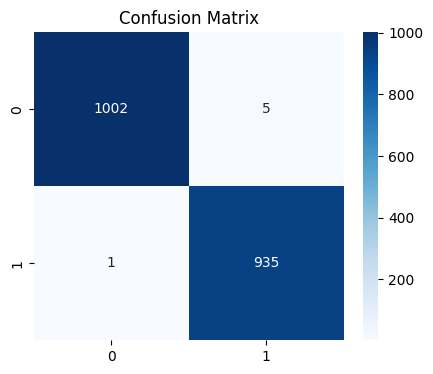

Confusion Matrix:
 [[1002    5]
 [   1  935]]

Accuracy Score: 99.69%
F1 Score: 0.9968017057569296
Precision Score: 0.9946808510638298
Recall Score: 0.9989316239316239
AUC Score: 0.9969831903173512

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1007
           1       0.99      1.00      1.00       936

    accuracy                           1.00      1943
   macro avg       1.00      1.00      1.00      1943
weighted avg       1.00      1.00      1.00      1943



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

xgb = XGBClassifier(scale_pos_weight=5, eval_metric='logloss', use_label_encoder=False)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
ML_model(xgb)

In [ ]:
rf_probs = rfmodel.predict_proba(X_test)[:, 1]

In [ ]:
ann_probs=xgb.predict_proba(X_test)[:, 1]

In [ ]:
import numpy as np

# Stack them as columns
hybrid_input = np.column_stack((rf_probs, ann_probs))

In [ ]:
from sklearn.linear_model import LogisticRegression
meta_model = LogisticRegression(class_weight='balanced')
meta_model.fit(hybrid_input, y_test)


# Make final predictions
final_preds = meta_model.predict(hybrid_input)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Basic Metrics
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

# Optional: Confusion Matrix and Full Report
conf_matrix = confusion_matrix(y_test, final_preds)
class_report = classification_report(y_test, final_preds)

# Print the results
print(f"🔍 Accuracy:  {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"📈 Recall:    {recall:.4f}")
print(f"🏁 F1 Score:  {f1:.4f}")
print("\n📊 Confusion Matrix:\n", conf_matrix)
print("\n📝 Classification Report:\n", class_report)


🔍 Accuracy:  0.9974
🎯 Precision: 0.9957
📈 Recall:    0.9989
🏁 F1 Score:  0.9973

📊 Confusion Matrix:
 [[1003    4]
 [   1  935]]

📝 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1007
           1       1.00      1.00      1.00       936

    accuracy                           1.00      1943
   macro avg       1.00      1.00      1.00      1943
weighted avg       1.00      1.00      1.00      1943



In [ ]:
X_new=X_train[14:11]
rf_prob = rfmodel.predict_proba(X_new)[:, 1].reshape(-1, 1)


In [ ]:
ann_prob=xgb.predict_proba(X_new)[:, 1].reshape(-1, 1)
rf_prob
ann_prob

array([[0.00035512]], dtype=float32)

In [ ]:
import numpy as np

hybrid_input = np.concatenate((rf_prob, ann_prob), axis=1)  # shape: (n_samples, 2)


In [ ]:
final_preds = meta_model.predict(hybrid_input)           # Binary predictions (0 or 1)
final_probs = meta_model.predict_proba(hybrid_input)[:, 1]  # Probability of stroke


In [ ]:
final_probs
y_train[14:15]

,stroke
7678,1


In [ ]:
import pickle

# Assuming 'model' is your trained model
filename = 'model3.pkl'

# Save the model to a file
with open(filename, 'wb') as file:
    pickle.dump(meta_model, file)

print("Model saved as stroke_model.pkl")


Model saved as stroke_model.pkl


In [ ]:
# Instead of joblib
xgb.save_model("xgb_model.json")  # or .model
